# Spherical Coordinate System

## Converting Spherical Coordinates with Distances Into 3 Dimensions

Note: The following is a supplement to the `orion_constellation` project. Here instead of relying on the original authors' x, y, z coordinates for the major stars in the Orion constellation, I have created the `orion.csv` file which takes the right ascension $\alpha$, declination $\delta$, and distance $d$*** data for each star and uses geometry via the equations below to convert this data into x, y, and z coordinates. Note that these coordinates do not match the original article because these are calculated differently than the article; however the each star's coordinates in each coordinate system are relationally consistent.

The `orion.csv` file also includes supplemental data such as the star's estimated mass, radius, absolute brightness, etc. 

***I have found that consulting different sources for distance measurements to individual stars results in some discrepancies- i.e. distance to stars is inferred by brightness, color, redshift, etc. thus different sources have different estimates. 


Given ISO convention:
<br>
&emsp;radius, $r$ <br>
&emsp;polar angle, $\theta$ <br>
&emsp;azimuth, $\phi$
<br><br>
And astronomical:
<br>
&emsp;distance, $d$ <br>
&emsp;right ascension, $\alpha$ <br>
&emsp;declination, $\delta$ 
<br>
<br>
Equivalence: <br>
&emsp;$r$ = $d$ <br>
&emsp;$\theta$ = 90° - $\delta$  <br>
&emsp;$\phi$ = $\alpha$ <br>


Cartesian Coordinate Conversion: <br>
&emsp;$x$  =  $r$ cos$\phi$ sin$\theta$ <br>
&emsp;$y$  =  $r$ sin$\phi$ sin$\theta$ <br>
&emsp;$z$  =  $r$ cos$\theta$ <br>

In [25]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [26]:
orion_data = pd.read_csv('orion.csv')

In [27]:
orion_data.head()

,Proper_Name,Bayer,RA_hr,RA_min,RA_sec,RA_dec,RA_adj,Dec_sign,Dec_deg,Dec_min,...,Mass,Mass_plus_minus,Radius,Rad_plus_minus,x,x_adj,y,y_adj,z,z_adj
0,Betelgeuse,α Orionis,5.0,55.0,10.30000,88.79,10.79,1.0,7.0,24.0,...,17.75,1.25,892.50,128.5,0.13,4.00,6.19,0.76,0.80,1.28
1,Rigel,β Orionis,5.0,14.0,32.27000,78.63,0.63,-1.0,8.0,12.0,...,21.30,3.00,78.90,7.4,1.51,7.73,7.49,0.09,-1.10,0.24
2,Bellatrix,γ Orionis,5.0,25.0,7.86325,81.28,3.28,1.0,6.0,20.0,...,7.70,0.00,5.75,0.0,0.37,2.33,2.41,0.13,0.27,0.68
3,Mintaka,δ Orionis,5.0,32.0,0.40000,83.00,5.00,-1.0,0.0,17.0,...,24.00,0.00,16.50,0.0,1.12,8.99,9.09,0.79,-0.05,1.54
4,Alnilam,ε Orionis,5.0,36.0,12.80000,84.05,6.05,-1.0,1.0,12.0,...,42.00,2.00,32.40,0.0,1.39,13.19,13.34,1.40,-0.28,2.05


In [29]:
distances = orion_data['Distance3']
print(distances)

0       427
1       773
2       243
3       916
4     1,342
5       817
6       722
7      1325
8      1344
9     1,043
10      NaN
Name: Distance3, dtype: object


In [32]:
print(orion_data['Abs_mag'])

0    -5.85
1    -7.84
2    -2.78
3    -4.20
4    -6.89
5    -6.00
6    -6.10
7    -4.25
8     0.00
9    -4.25
10     NaN
Name: Abs_mag, dtype: float64


<IPython.core.display.Javascript object>


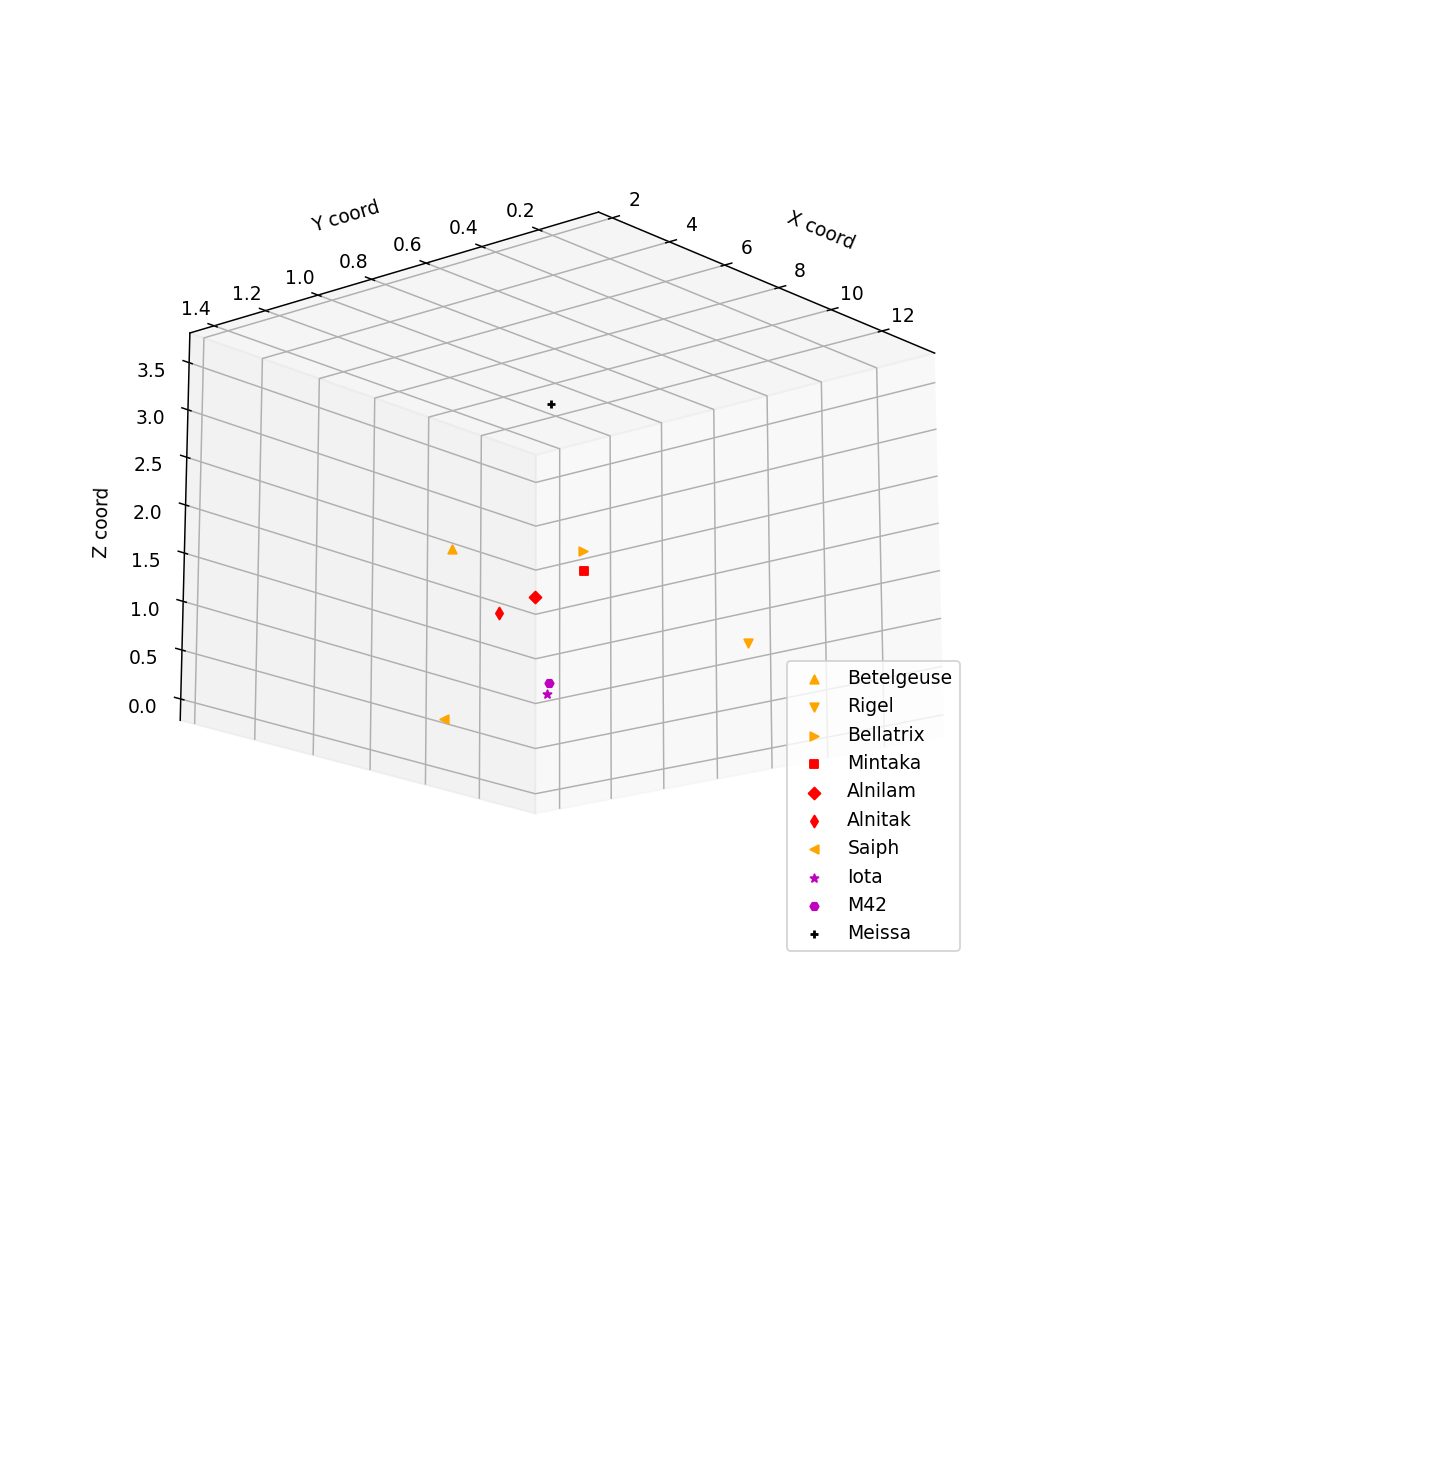

In [28]:
names = orion_data['Proper_Name']
x = orion_data['x_adj']
y = orion_data['y_adj']
z = orion_data['z_adj']









fig_3d = plt.figure(figsize=(8,8))
constellation3d = fig_3d.add_subplot(1,1,1,projection='3d')
constellation3d.scatter(x[0], y[0], z[0], marker = '^', color = 'orange', label = names[0])
constellation3d.scatter(x[1], y[1], z[1], marker = 'v', color = 'orange', label = names[1])
constellation3d.scatter(x[2], y[2], z[2], marker = '>', color = 'orange', label = names[2] )
constellation3d.scatter(x[3], y[3], z[3], marker = 's', color = 'red', label = names[3])
constellation3d.scatter(x[4], y[4], z[4], marker = 'D', color = 'red', label = names[4])
constellation3d.scatter(x[5], y[5], z[5], marker = 'd', color = 'red', label = names[5])
constellation3d.scatter(x[6], y[6], z[6], marker = '<', color = 'orange', label = names[6])
constellation3d.scatter(x[7], y[7], z[7], marker = '*', color = 'm', label = names[7])
constellation3d.scatter(x[8], y[8], z[8], marker = 'H', color = 'm', label = names[8])
constellation3d.scatter(x[9], y[9], z[9], marker = '+', color = 'black', label = names[9])
# constellation3d.scatter(x[-1],y[-1],z[-1], marker = 'o', color = 'blue', label = names[10])

constellation3d.set_xlabel('X coord')
constellation3d.set_ylabel('Y coord')
constellation3d.set_zlabel('Z coord')

plt.legend(loc=4)
plt.savefig('3d_actual_orientation_orion.png')
plt.show()

## Conclusion

The plot above shows the 3-d model from the perspective of earth. If we were actually 'inside' the model at Earth's location we would see perspective on the stars and I believe they would line up to show our view. In any case, the plot gives an accurate, God's eye view of the stars. This can be duplicated for any group of stars as long as we know its position in the sky and its approximate distance from Earth. 

Very cool. 

Of course one could download Celestia, but this is more fun.